### **Theory Behind RNNS DATA ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
import pandas as pd

# Upload a CSV file from your local machine to Colab
uploaded = files.upload()

# Assuming you uploaded a file named "example.csv"
file_name = "chat_dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

Saving chat_dataset.csv to chat_dataset.csv


In [ ]:
print(df)
print(df.head())
sentence=df["message"].tolist()
print(sentence)

                                               message sentiment
0                           I really enjoyed the movie  positive
1                                The food was terrible  negative
2                   I'm not sure how I feel about this   neutral
3                            The service was excellent  positive
4                               I had a bad experience  negative
..                                                 ...       ...
579  I have to cancel my vacation plans because I c...  negative
580  My computer crashed and I lost all my importan...  negative
581  I got into a car accident and my car is totale...  negative
582  I have a cold and can't stop coughing. it's re...  negative
583  I just found out my ex is dating someone new. ...  negative

[584 rows x 2 columns]
                              message sentiment
0          I really enjoyed the movie  positive
1               The food was terrible  negative
2  I'm not sure how I feel about this   neutral
3   

In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
len(tokenizer.word_index)

864

In [ ]:
sequences=tokenizer.texts_to_sequences(sentence)
sequences

[[3, 47, 143, 1, 38],
 [1, 34, 5, 54],
 [2, 13, 20, 71, 3, 144, 21, 4],
 [1, 25, 5, 76],
 [3, 55, 6, 100, 173],
 [4, 7, 6, 48, 28],
 [3, 174, 145, 4],
 [1, 229, 7, 6, 27, 175],
 [1, 49, 7, 364, 24],
 [1, 77, 7, 230],
 [2, 14, 122, 21, 4],
 [1, 123, 5, 62],
 [1, 146, 25, 5, 54],
 [4, 57, 7, 6, 365],
 [3, 124, 176, 4, 28],
 [1, 86, 43, 50, 7, 177],
 [3, 30, 101, 41, 9, 231, 21, 4],
 [1, 178, 366, 7, 367],
 [1, 72, 5, 368],
 [1, 232, 233, 7, 369, 175],
 [3, 30, 18, 73, 78, 22, 4],
 [1, 29, 147, 5, 370, 10, 179],
 [1, 25, 16, 4, 51, 5, 180],
 [4, 79, 7, 63, 234, 181],
 [1, 235, 26, 1, 28, 7, 182],
 [3, 30, 47, 108, 21, 4],
 [1, 74, 5, 236],
 [4, 7, 73, 76, 64, 9, 40, 17],
 [1, 38, 5, 6, 371, 26, 35],
 [2, 183, 21, 4],
 [1, 87, 5, 6, 372, 373],
 [1, 80, 50, 7, 102],
 [1, 88, 5, 63, 374],
 [3, 55, 6, 48, 35],
 [4, 28, 7, 184],
 [2, 185, 9, 4],
 [1, 89, 5, 186],
 [1, 56, 375, 148, 22, 1, 376],
 [3, 30, 18, 65, 90, 21, 4],
 [1, 34, 5, 125],
 [1, 25, 16, 4, 29, 5, 54],
 [4, 58, 7, 62],
 [2, 13,

In [ ]:
from keras.utils import pad_sequences
X=pad_sequences(sequences,padding="post",maxlen=75)
X

array([[  3,  47, 143, ...,   0,   0,   0],
       [  1,  34,   5, ...,   0,   0,   0],
       [  2,  13,  20, ...,   0,   0,   0],
       ...,
       [  3,  32, 141, ...,   0,   0,   0],
       [  3,  18,   6, ...,   0,   0,   0],
       [  3,  11, 337, ...,   0,   0,   0]], dtype=int32)

In [ ]:
df["sentiment"] = df["sentiment"].replace("positive", 1)
df["sentiment"] = df["sentiment"].replace("neutral", 0)
df["sentiment"] = df["sentiment"].replace("negative", -1)

print(df["sentiment"])

0      1
1     -1
2      0
3      1
4     -1
      ..
579   -1
580   -1
581   -1
582   -1
583   -1
Name: sentiment, Length: 584, dtype: int64


In [ ]:
df1 = pd.DataFrame(X)
print(df1)
print(df1.shape)

     0    1    2    3    4    5    6    7    8    9   ...  65  66  67  68  69  \
0     3   47  143    1   38    0    0    0    0    0  ...   0   0   0   0   0   
1     1   34    5   54    0    0    0    0    0    0  ...   0   0   0   0   0   
2     2   13   20   71    3  144   21    4    0    0  ...   0   0   0   0   0   
3     1   25    5   76    0    0    0    0    0    0  ...   0   0   0   0   0   
4     3   55    6  100  173    0    0    0    0    0  ...   0   0   0   0   0   
..   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..   
579   3   18    9  847    8  111  848  849    3   95  ...   0   0   0   0   0   
580   8  852  853   10    3   84   92    8  342  854  ...   0   0   0   0   0   
581   3   32  141    6   56  352   10    8   56    7  ...   0   0   0   0   0   
582   3   18    6  857   10   95  858  859  226   47  ...   0   0   0   0   0   
583   3   11  337   31    8  862    7  863  139   37  ...   0   0   0   0   0   

     70  71  72  73  74  
0

In [ ]:
model = Sequential()
model.add(Embedding(17,output_dim=2,input_length=75))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 75, 2)             34        
                                                                 
Total params: 34 (136.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile('adam','accuracy')

In [ ]:
pred = model.predict(X)
print(pred)

19/19 [==============================] - 0s 2ms/step
[[[ 0.02423267  0.01029723]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]]

 [[-0.00094838  0.00396047]
  [ 0.          0.        ]
  [-0.02944087 -0.001247  ]
  ...
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]]

 [[ 0.01896105  0.0050006 ]
  [-0.01233085 -0.03436309]
  [ 0.          0.        ]
  ...
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]]

 ...

 [[ 0.02423267  0.01029723]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]]

 [[ 0.02423267  0.01029723]
  [ 0.          0.        ]
  [-0.00040543  0.01425394]
  ...
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]
  [ 0.02981604  0.01422397]]

 [[ 0.02423267  0.01029723]
  [-0.00694744 -0.02678831]
  [ 0

### **Implementing Sentiment Analysis using SimpleRNN**


---





In [10]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten,LSTM, Dropout

In [2]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [4]:
X_train.shape

(25000, 50)

In [18]:
model = Sequential()
model.add(Embedding(10000, 2,input_length=50))
model.add(Dropout(0.3))
model.add(SimpleRNN(64,return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(16,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 2)             20000     
                                                                 
 dropout_6 (Dropout)         (None, 50, 2)             0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50, 64)            4288      
                                                                 
 dropout_7 (Dropout)         (None, 50, 64)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16)                1296      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 25601 (100.00 KB)
Trainable params: 2560

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 104s 130ms/step - loss: 0.7014 - acc: 0.5047 - val_loss: 0.6954 - val_acc: 0.5015
Epoch 2/5
782/782 [==============================] - 92s 117ms/step - loss: 0.6226 - acc: 0.6436 - val_loss: 0.4699 - val_acc: 0.7826
Epoch 3/5
782/782 [==============================] - 91s 116ms/step - loss: 0.4582 - acc: 0.7872 - val_loss: 0.4695 - val_acc: 0.7941
Epoch 4/5
782/782 [==============================] - 87s 111ms/step - loss: 0.4050 - acc: 0.8208 - val_loss: 0.4510 - val_acc: 0.8006
Epoch 5/5
782/782 [==============================] - 90s 115ms/step - loss: 0.3760 - acc: 0.8396 - val_loss: 0.4276 - val_acc: 0.8068


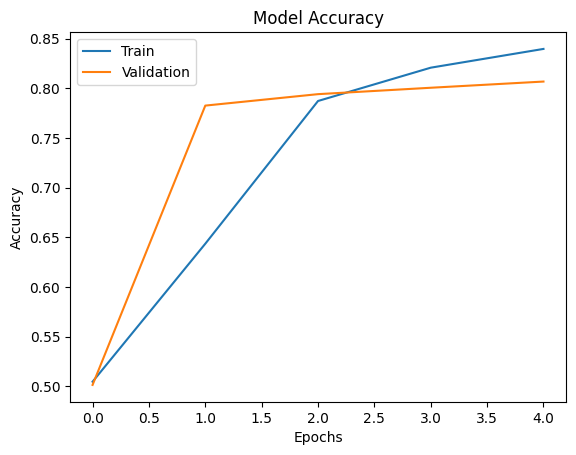

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### **Now implementing sentiment analysis Using LSTM layers**

---



In [25]:
model1 = Sequential()
model1.add(Embedding(10000, 2,input_length=50))
model1.add(LSTM(128,return_sequences=True))
model1.add(Dropout(0.6))
model1.add(LSTM(64,return_sequences=True))
model1.add(Dropout(0.6))
model1.add(LSTM(16))
model1.add(Dropout(0.6))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 50, 2)             20000     
                                                                 
 lstm_15 (LSTM)              (None, 50, 128)           67072     
                                                                 
 dropout_13 (Dropout)        (None, 50, 128)           0         
                                                                 
 lstm_16 (LSTM)              (None, 50, 64)            49408     
                                                                 
 dropout_14 (Dropout)        (None, 50, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 16)                5184      
                                                                 
 dropout_15 (Dropout)        (None, 16)              

In [26]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model1.fit(X_train, y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
782/782 [==============================] - 35s 38ms/step - loss: 0.5658 - acc: 0.6844 - val_loss: 0.4491 - val_acc: 0.7972
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3853 - acc: 0.8398 - val_loss: 0.4131 - val_acc: 0.8086
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3325 - acc: 0.8696 - val_loss: 0.4643 - val_acc: 0.8038
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.2982 - acc: 0.8861 - val_loss: 0.4402 - val_acc: 0.8066
Epoch 5/10
782/782 [==============================] - 13s 17ms/step - loss: 0.2753 - acc: 0.8981 - val_loss: 0.4411 - val_acc: 0.8031
Epoch 6/10
782/782 [==============================] - 13s 16ms/step - loss: 0.2585 - acc: 0.9064 - val_loss: 0.4954 - val_acc: 0.7980
Epoch 7/10
782/782 [==============================] - 13s 17ms/step - loss: 0.2402 - acc: 0.9149 - val_loss: 0.5135 - val_acc: 0.7950
Epoch 8/10
782/782 [==============================] - 14s 18ms

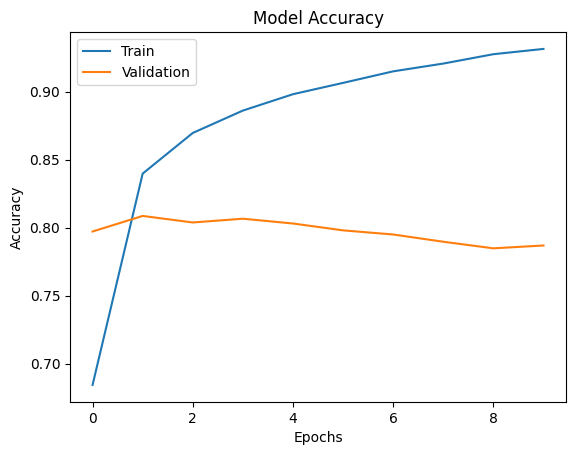

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Thank You**